## PROJECT TO PREDICT MODEL FOR EASY VISA DATASET 

## Phase 1 : Data Collection and Preparation
Task 1.1: Load the dataset into a pandas DataFrame

DATA INGESTION

In [203]:
# Importing of necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.calibration import LabelEncoder

In [204]:
# Load the dataset
url= r"https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/EasyVisa%20(1).csv"

In [205]:
# Load the dataset from pandas
data = pd.read_csv(url)
data.head(5)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


PREMILARY DATA ANALYSIS

In [206]:
# Inspect the dataset for missing values and handle them appropriately
data.shape
# From the dataset there are 25480 rows and 12 columns

(25480, 12)

In [207]:
data.isnull().sum()

# From the dataset this indicate that there is no missing value in the dataset

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [208]:
data.columns
# This reveals all the columns title we have in the dataset

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [209]:
data.duplicated().sum()
# this indicate that the dataset has no duplicate

np.int64(0)

In [210]:
data.drop(columns=["case_id"], inplace=True)
data.head()
# data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


## Phase 2: EXPLORATORY DATA ANALYSIS (EDA)

Descriptive Data Analysis

In [211]:
data.describe().round(2).sum()

no_of_employees    662702.97
yr_of_estab         37295.78
prevailing_wage    684023.36
dtype: float64

In [212]:
data.info()
# From the dataset we have 25480 of rows and 9 categorical columns, 2 numerical columns with (int64(2)) and 1 numerical columns with float(64)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   yr_of_estab            25480 non-null  int64  
 6   region_of_employment   25480 non-null  object 
 7   prevailing_wage        25480 non-null  float64
 8   unit_of_wage           25480 non-null  object 
 9   full_time_position     25480 non-null  object 
 10  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 2.1+ MB


# Exploratory Data Analysis

Understanding the dataset and checking out for the unquie values in the dataset

In [213]:
# making a list of all categorical columns in the  dataset
cat_col = list(data.select_dtypes("object").columns)
for col in cat_col:
    print(data[col].value_counts())
    print("--"*50)

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: count, dtype: int64
----------------

## Univariate Analysis

In [214]:
def histogram_boxplot(data, feature, figsize=(12, 8), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    plt.tight_layout()
    plt.show()

In [215]:
data.head(5)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [216]:
# Create a copy for preprocessing
df_processed = data.copy()



# 1. Check for missing values (EDA showed no missing values)
print("\n1. Missing Values:")
missing_values = data.isnull().sum()
if missing_values.sum() > 0:
    print(missing_values[missing_values > 0])
else:
    print("No missing values found (as expected from EDA)")

# 2. Check for duplicates
print("\n2. Duplicate Rows:")
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
if duplicates > 0:
    print(f"Percentage of duplicates: {(duplicates/len(data))*100:.2f}%")

# 3. Check skewness for variables identified in EDA as right-skewed
print("\n3. Skewness Analysis (EDA identified right-skewed variables):")
skewed_vars = ['no_of_employees', 'prevailing_wage', 'yr_of_estab']
for var in skewed_vars:
    if var in data.columns:
        skewness = data[var].skew()
        print(f"{var}: skewness = {skewness:.3f} ({'right-skewed' if skewness > 0.5 else 'approximately normal'})")


1. Missing Values:
No missing values found (as expected from EDA)

2. Duplicate Rows:
Number of duplicate rows: 0

3. Skewness Analysis (EDA identified right-skewed variables):
no_of_employees: skewness = 12.265 (right-skewed)
prevailing_wage: skewness = 0.756 (right-skewed)
yr_of_estab: skewness = -2.037 (approximately normal)


In [217]:
num_features=data.select_dtypes(include=['number']).columns
num_features

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

\histogram_boxplotno_of_employees


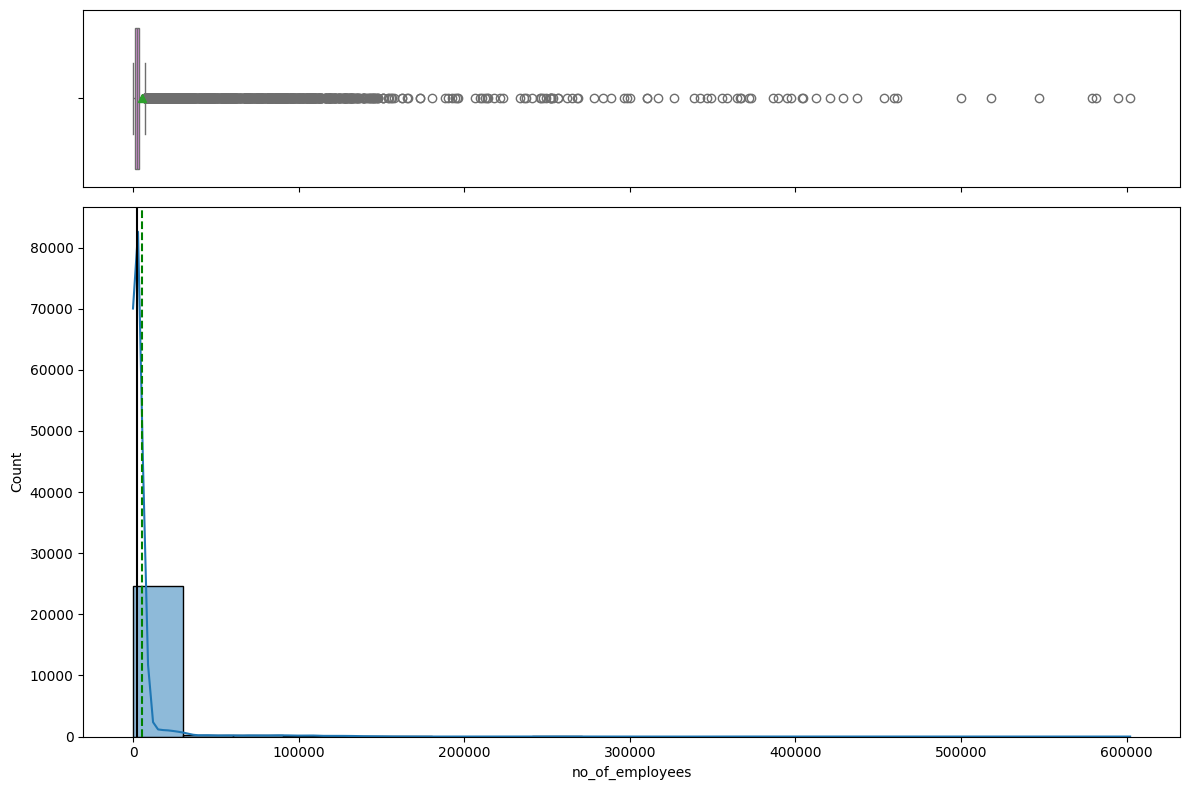

\histogram_boxplotyr_of_estab


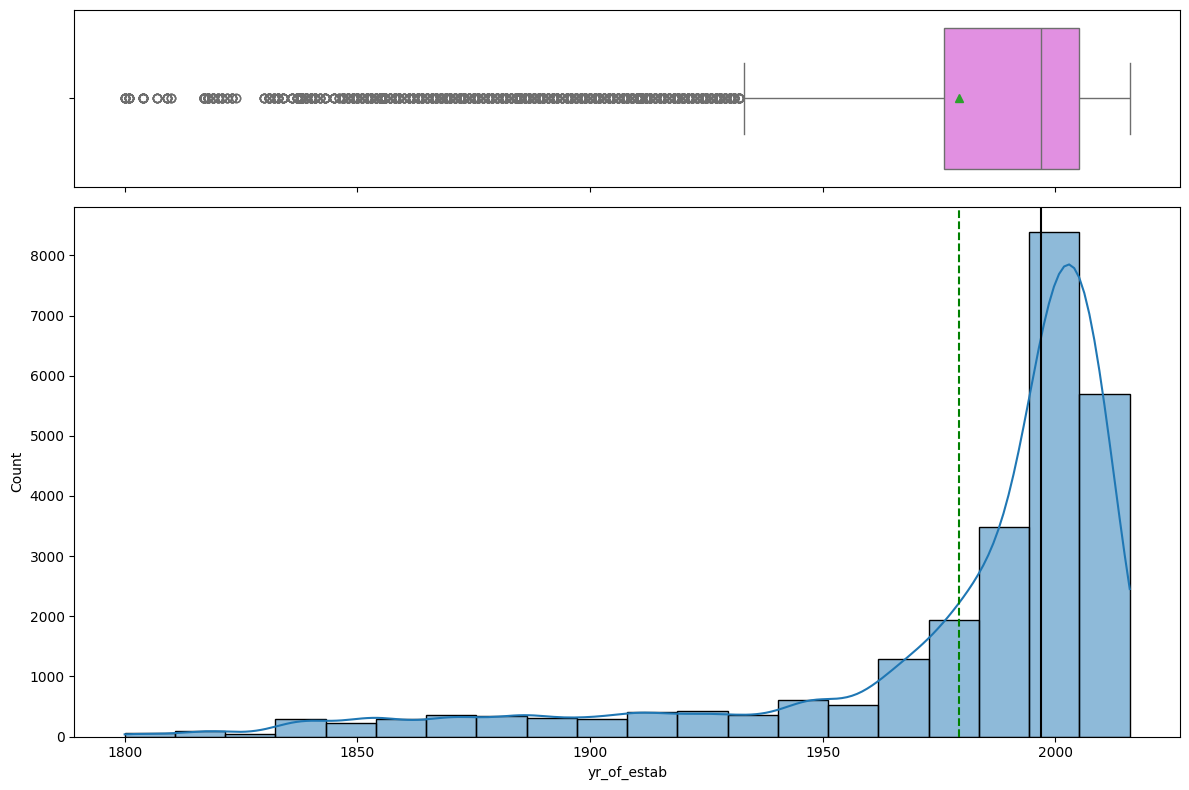

\histogram_boxplotprevailing_wage


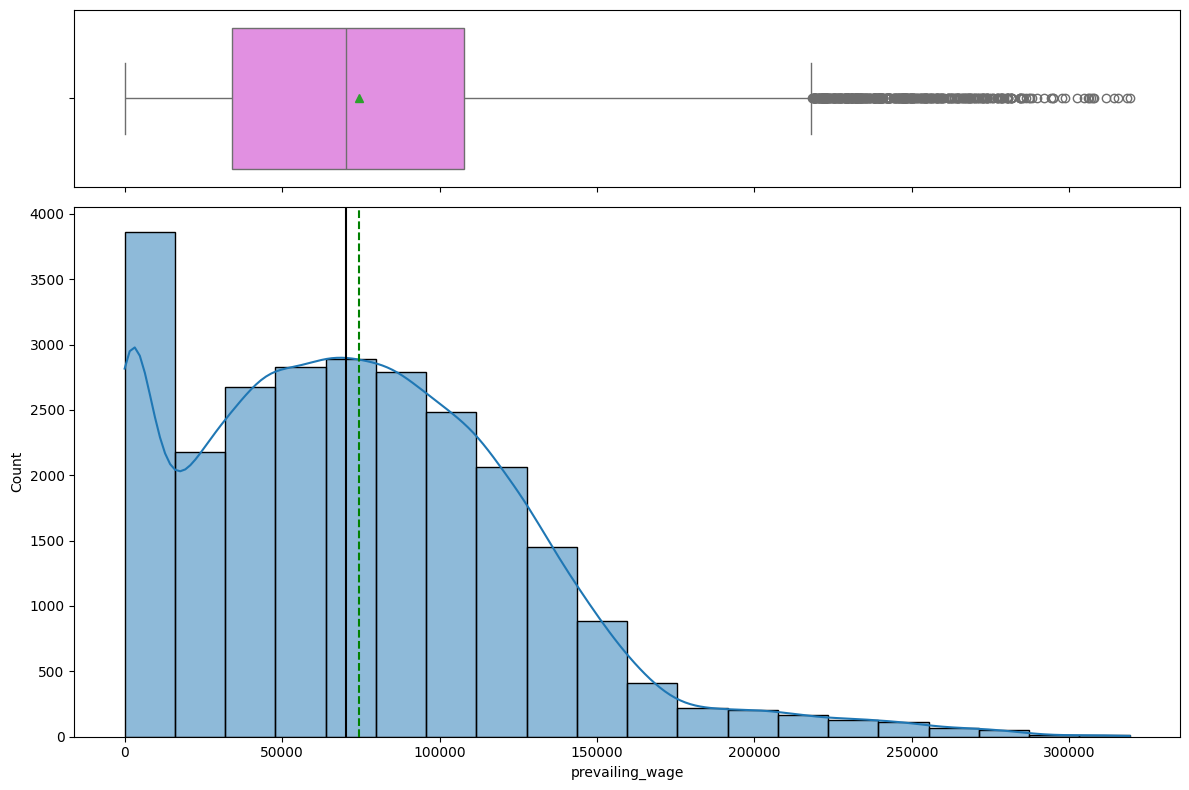

In [218]:
for col in num_features:
    print(f"\histogram_boxplot{col}")
    histogram_boxplot(data, col, kde=True, bins=20)



# Identify and handle outliers in the dataset.
# From the diagram above, findings from univariate data analysis most data are skewed and there are possible outliers 


In [219]:
cat_features=data.select_dtypes(include=['object']).columns
cat_features

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [220]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

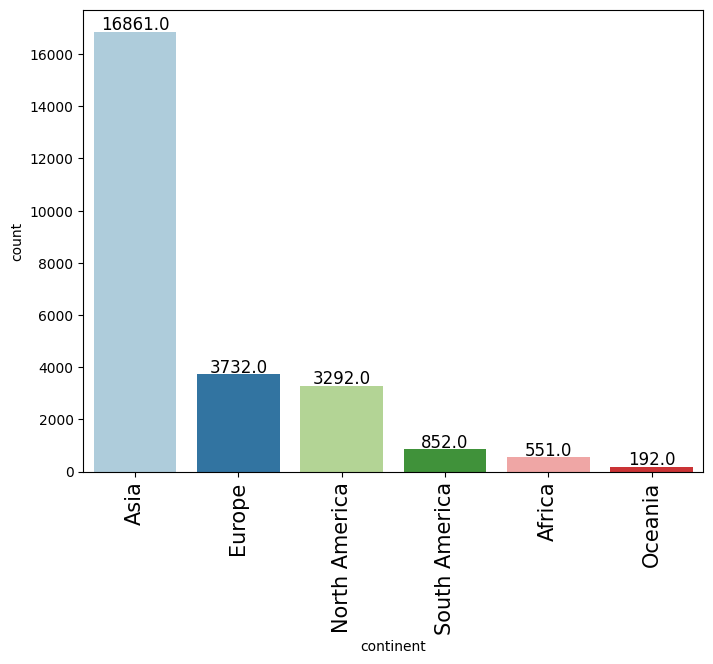

In [221]:
labeled_barplot(data, "continent", perc=False, n=None)
    

    

    

In [222]:
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


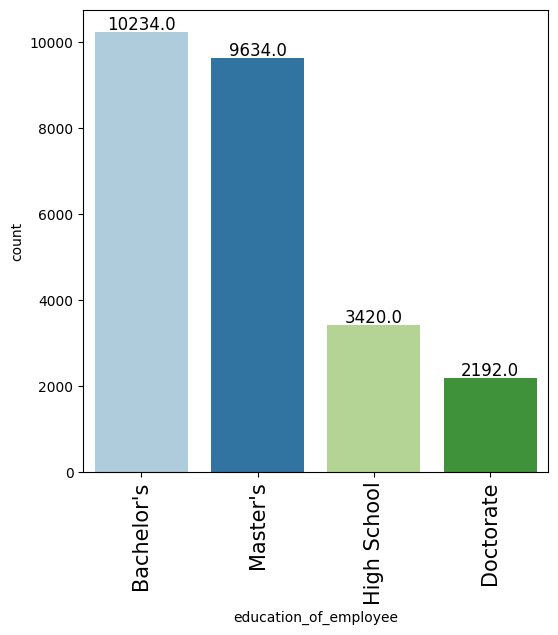

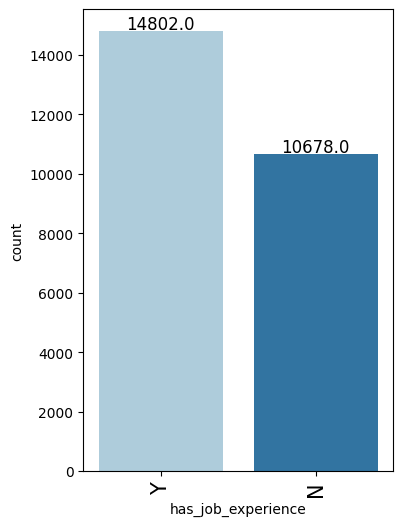

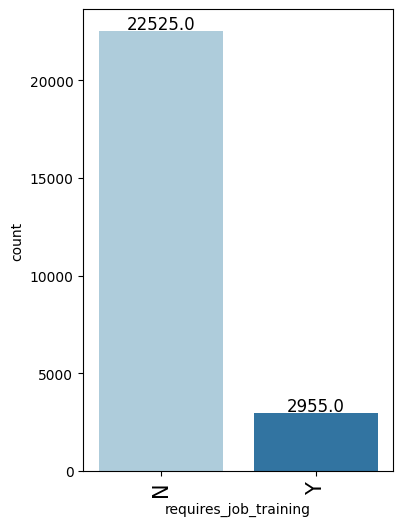

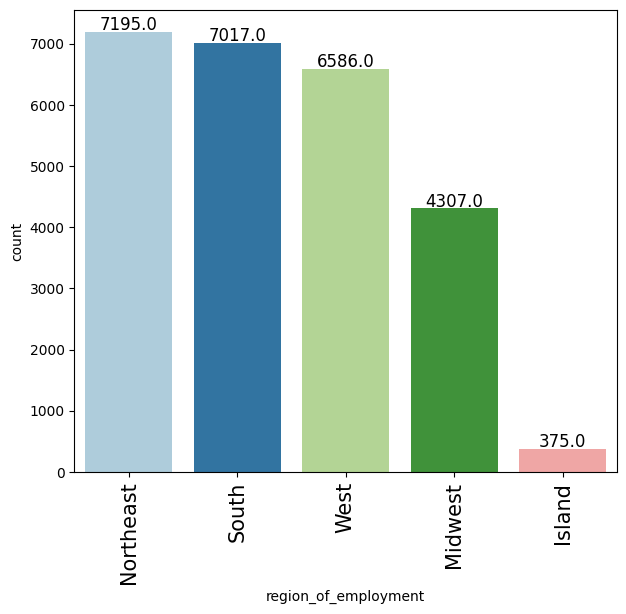

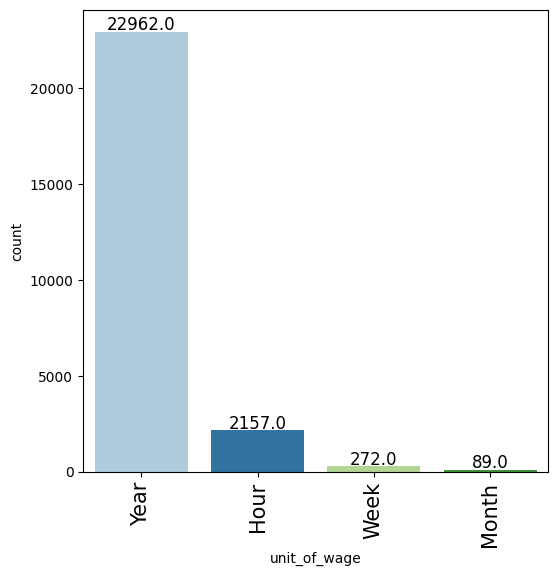

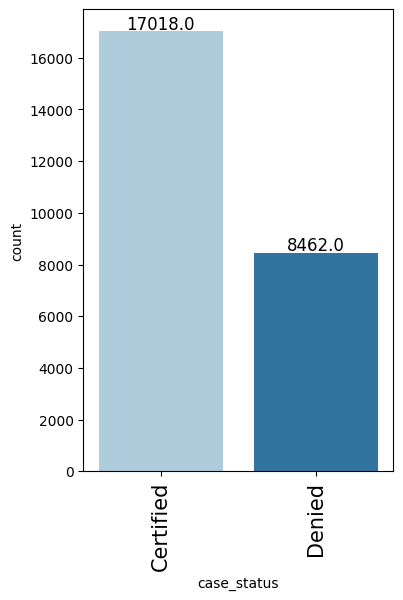

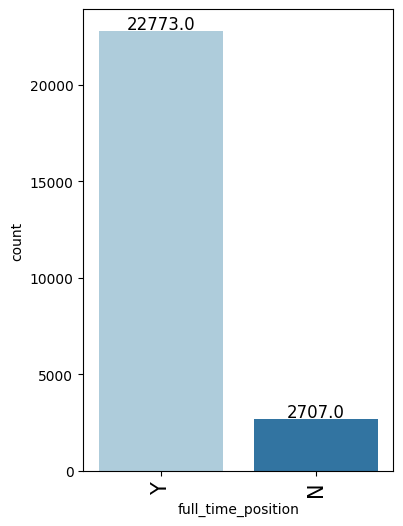

In [223]:
labeled_barplot(data, "education_of_employee", perc=False, n=None)
labeled_barplot(data, "has_job_experience", perc=False, n=None)
labeled_barplot(data, "requires_job_training", perc=False, n=None)
labeled_barplot(data, "region_of_employment", perc=False, n=None)
labeled_barplot(data, "unit_of_wage", perc=False, n=None)
labeled_barplot(data, "case_status", perc=False, n=None)
labeled_barplot(data, "full_time_position", perc=False, n=None)




    
    

## Bivariate Analsis

Numerical_col

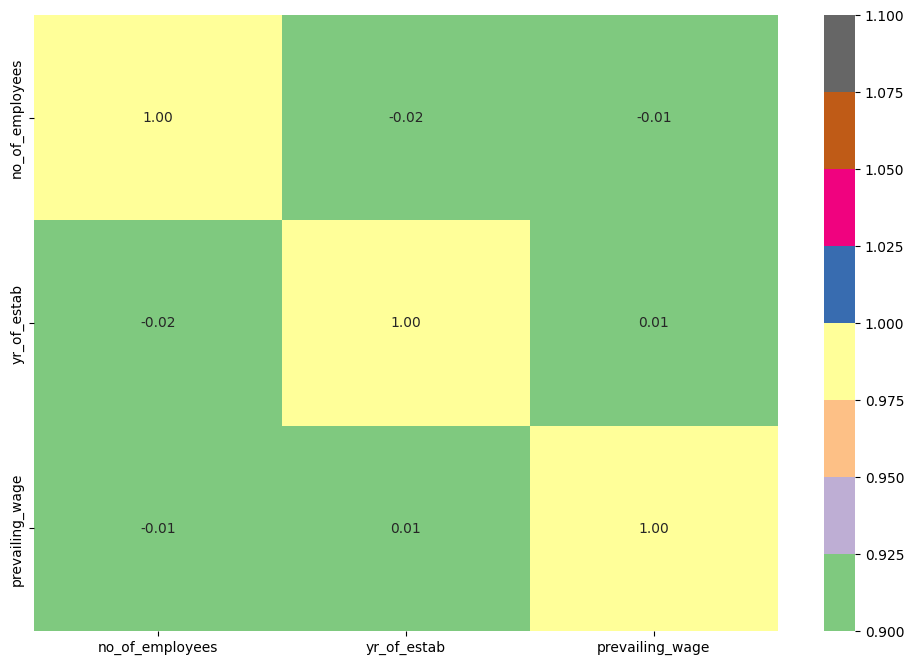

In [224]:
col_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 8))
sns.heatmap(
    data[col_list].corr(), annot=True, vmin=1, fmt=".2f", cmap="Accent"
)
plt.show()

In [225]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

\distribution_plot_wrt_targetno_of_employees


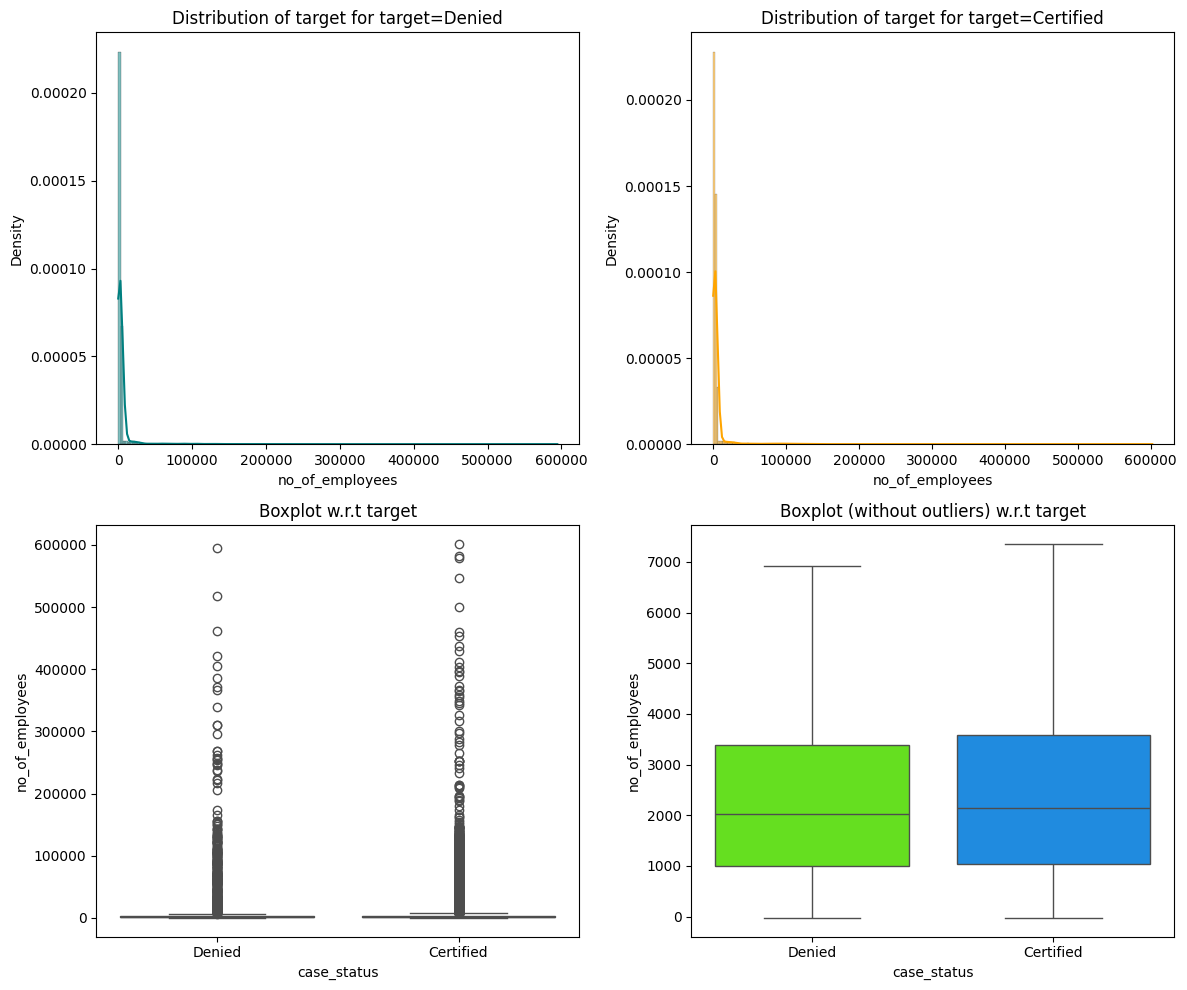

\distribution_plot_wrt_targetyr_of_estab


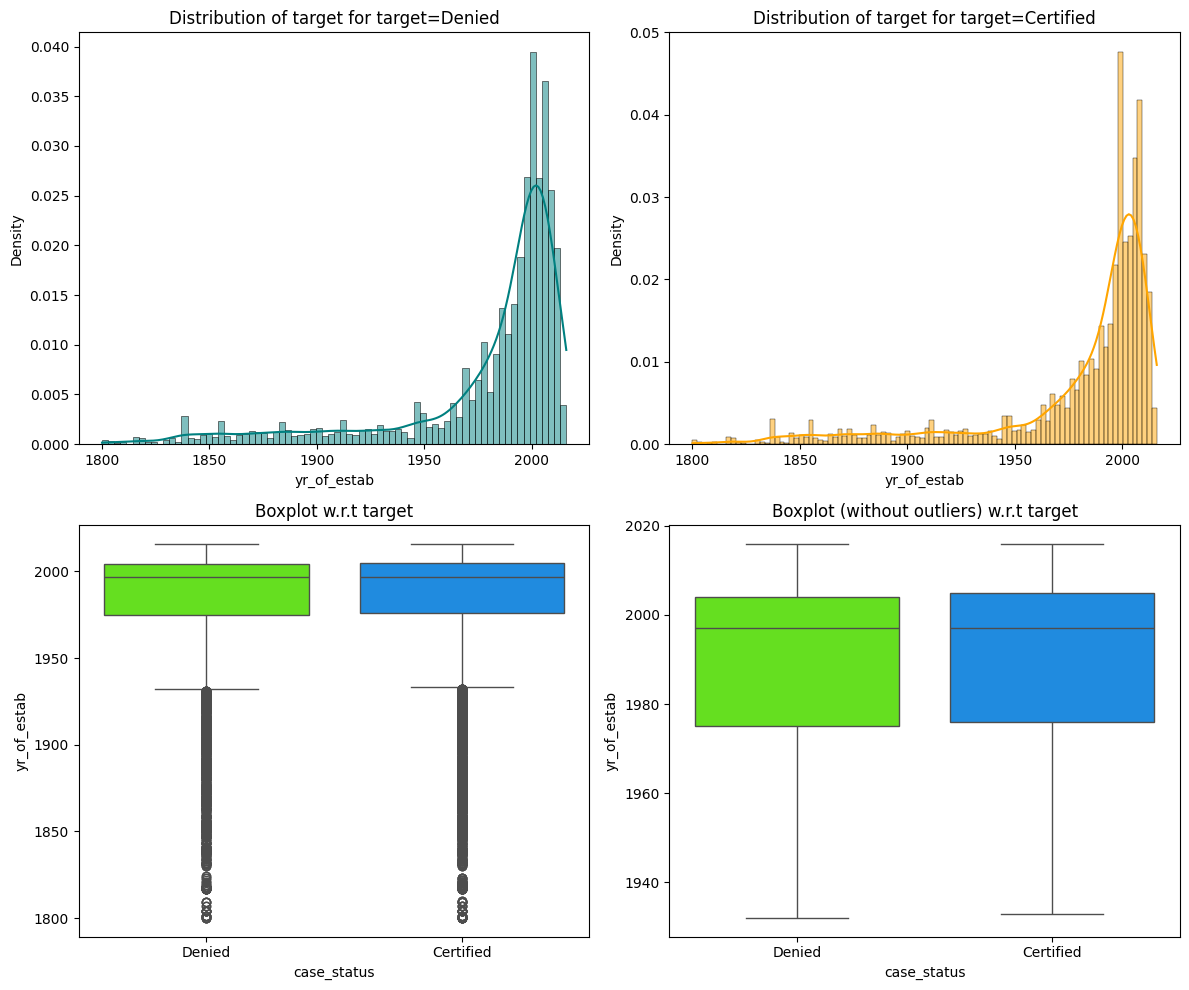

\distribution_plot_wrt_targetprevailing_wage


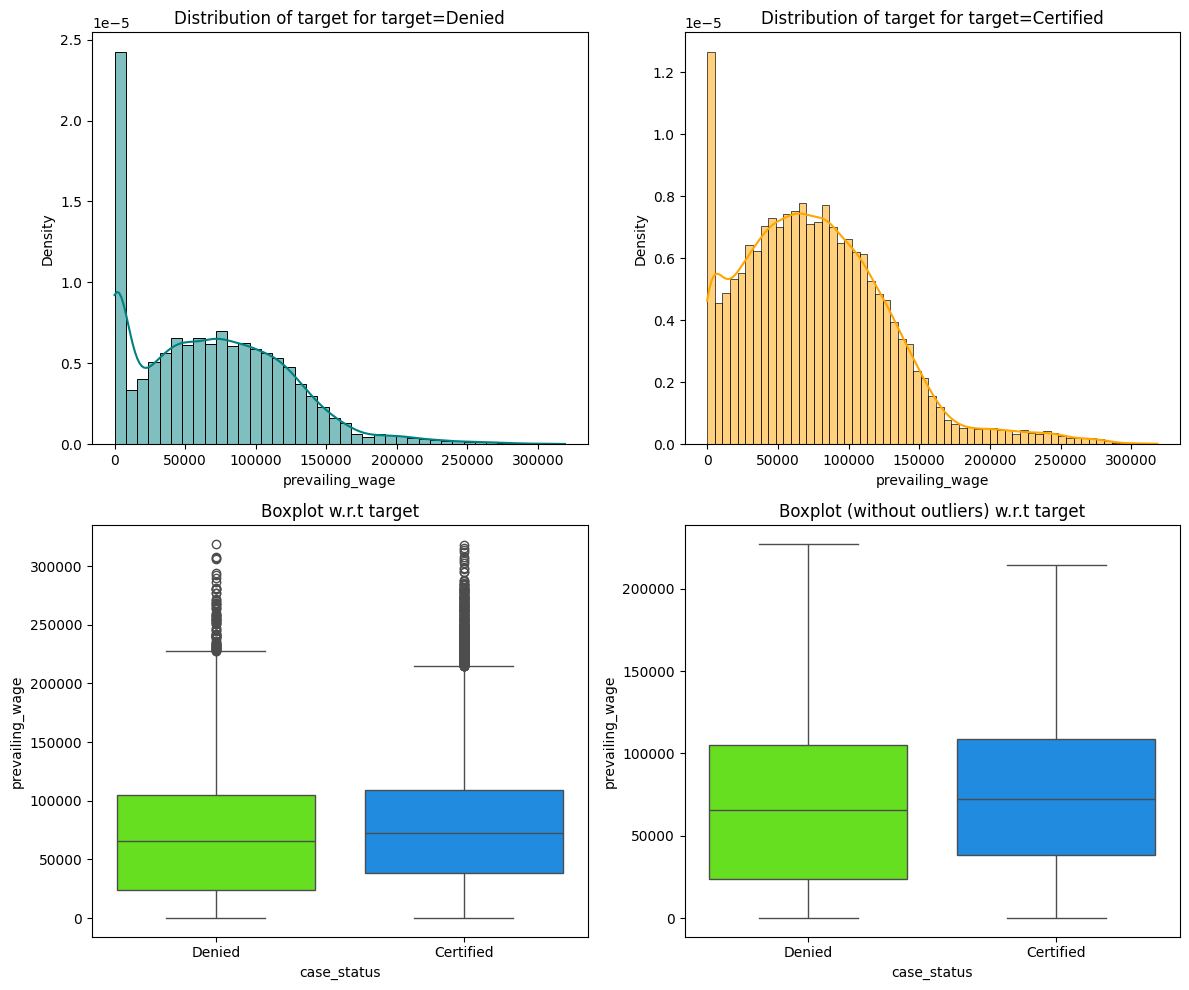

In [226]:
for col in num_features:
    print(f"\distribution_plot_wrt_target{col}")
    distribution_plot_wrt_target(data, col, target="case_status" )

Categorical_Feature

In [227]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

\stacked_barplotcontinent
case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


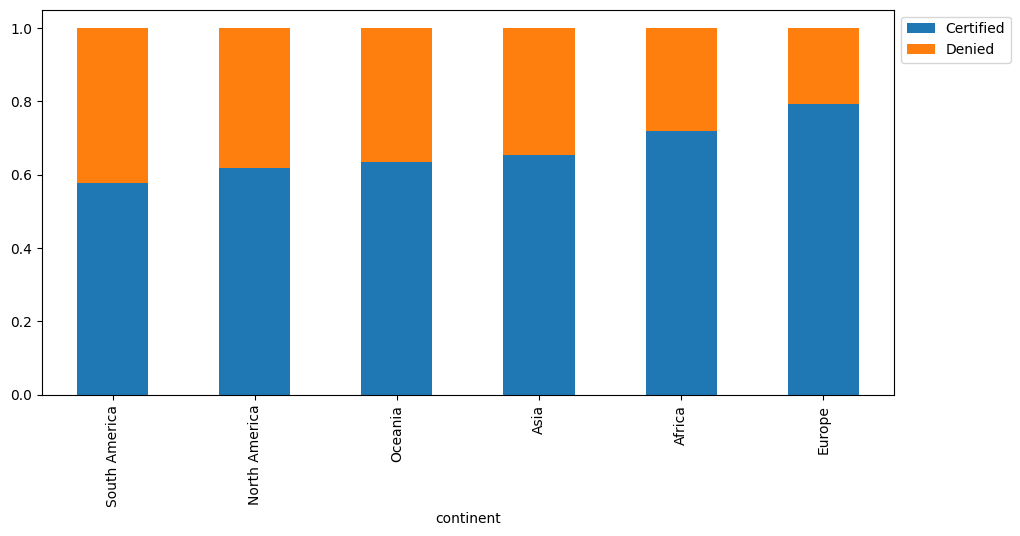

\stacked_barploteducation_of_employee
case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


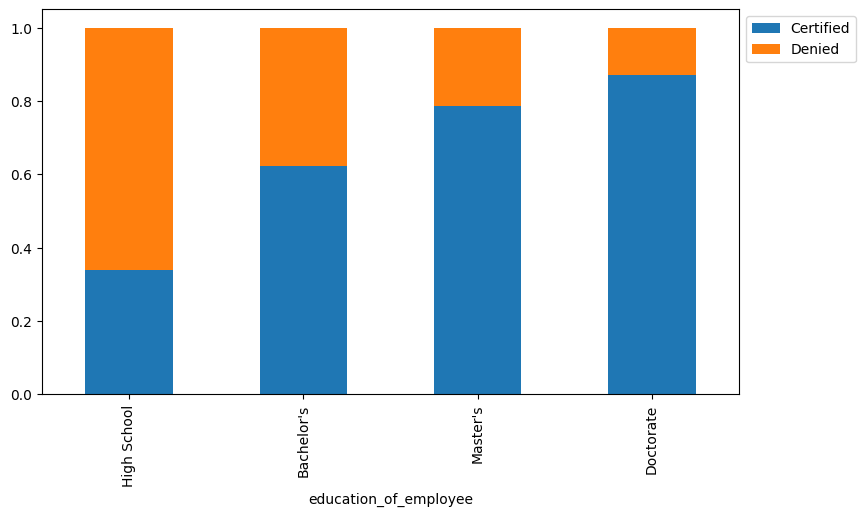

\stacked_barplothas_job_experience
case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


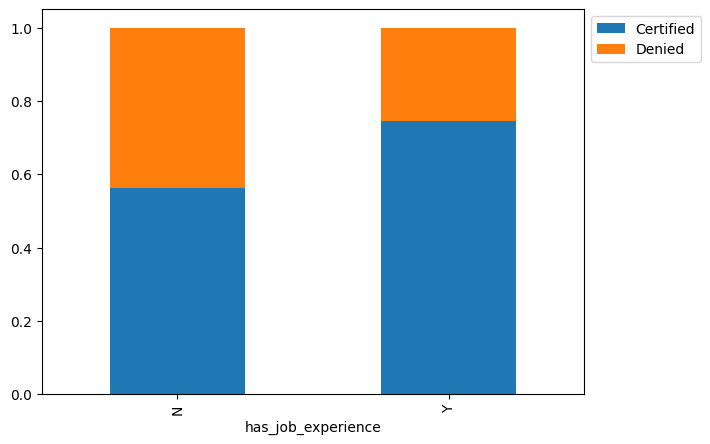

\stacked_barplotrequires_job_training
case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


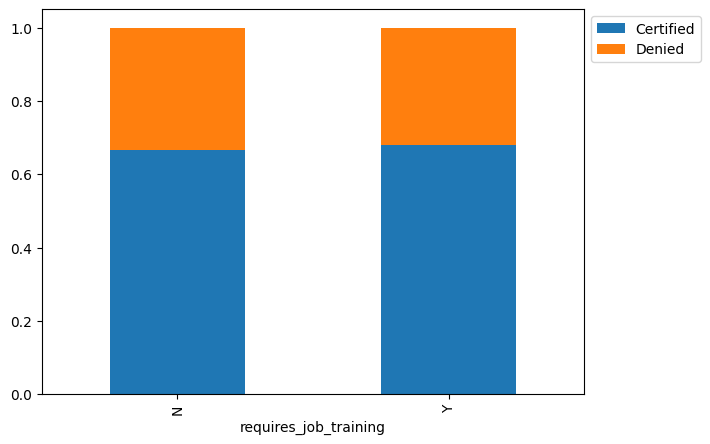

\stacked_barplotregion_of_employment
case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


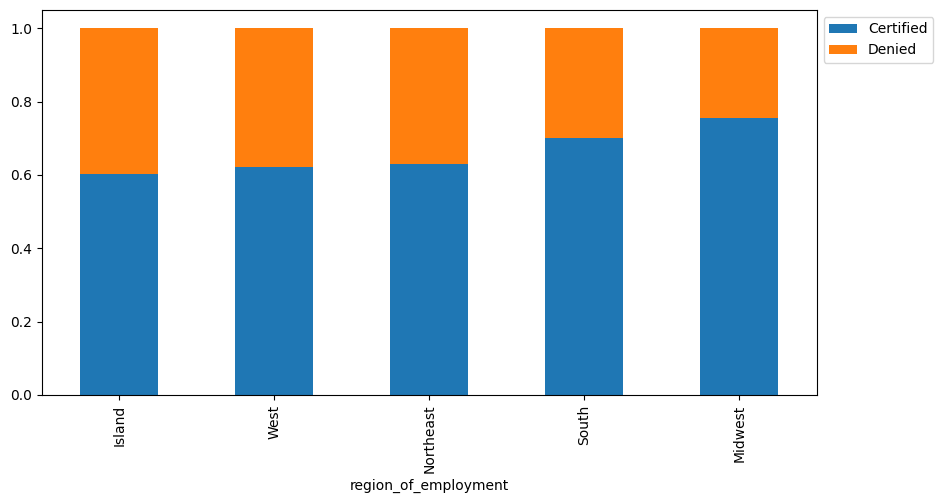

\stacked_barplotunit_of_wage
case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


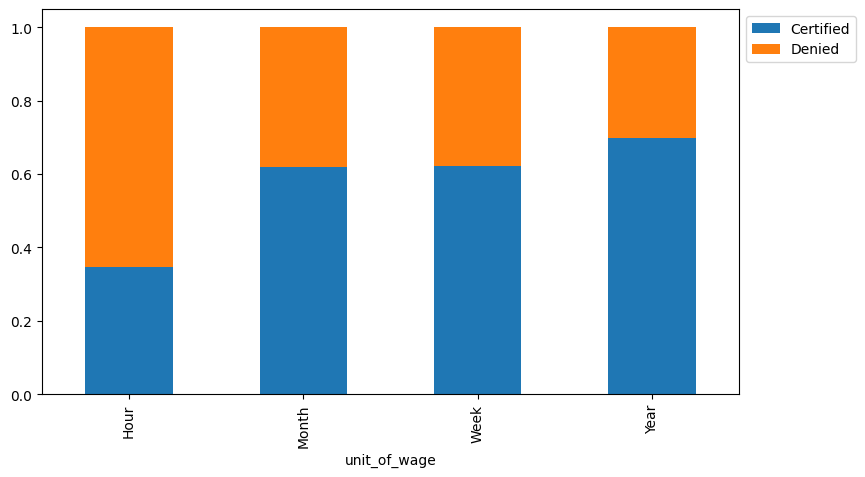

\stacked_barplotfull_time_position
case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


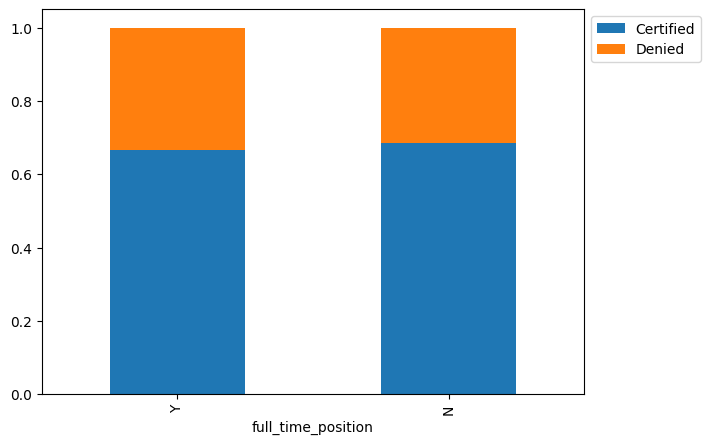

\stacked_barplotcase_status
case_status  Certified  Denied    All
case_status                          
Denied               0    8462   8462
All              17018    8462  25480
Certified        17018       0  17018
------------------------------------------------------------------------------------------------------------------------


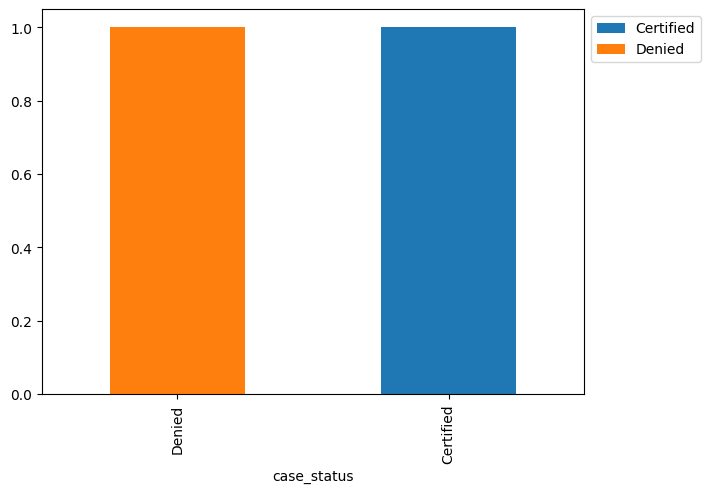

In [228]:
for col in cat_features:
    print(f"\stacked_barplot{col}")
    stacked_barplot(data, col, target="case_status" )

In [229]:
num_features =data.select_dtypes(include=[np.number]).columns
num_features
for col in num_features:
    print(f'{col} = {data[col].skew():.3f}"  skewness value')

no_of_employees = 12.265"  skewness value
yr_of_estab = -2.037"  skewness value
prevailing_wage = 0.756"  skewness value


In [230]:
def bivariate_num_cat(data1, feature, target='case_'):
    """
    Plots and summarizes relationship between a numerical feature and a categorical target.
    """
    print(f" Feature: {feature} vs {target}")
    print("="*50)

    # Group summary
    summary = data1.groupby(target)[feature].describe()[['mean','std','min','max']]
    print(summary)
    print()

    plt.figure(figsize=(10,5))

    # Boxplot + mean line
    sns.boxplot(x=target, y=feature, data=data1, palette='Set2')
    plt.title(f'{feature} across {target} categories', fontsize=13)
    plt.xlabel(target)
    plt.ylabel(feature)
    plt.show()

In [231]:
# for col in num_features:
#     for col2 in cat_features:
#         if col2 =="case_Status":
            # bivariate_num_cat(data, col, col2)

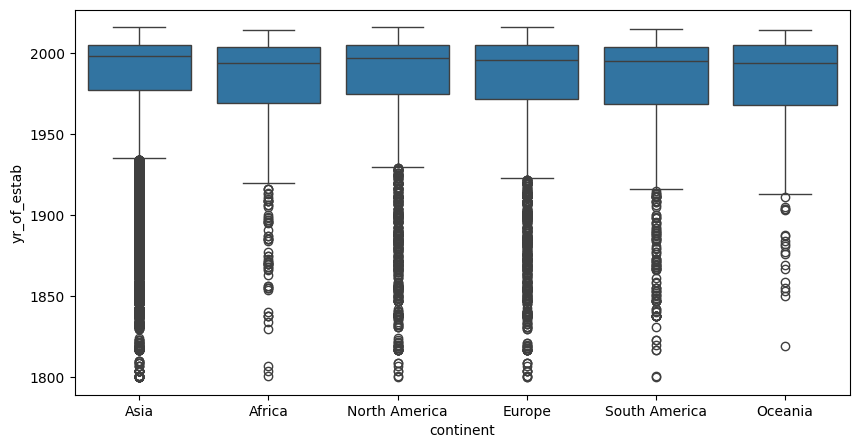

In [232]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="continent", y="yr_of_estab")
plt.show()

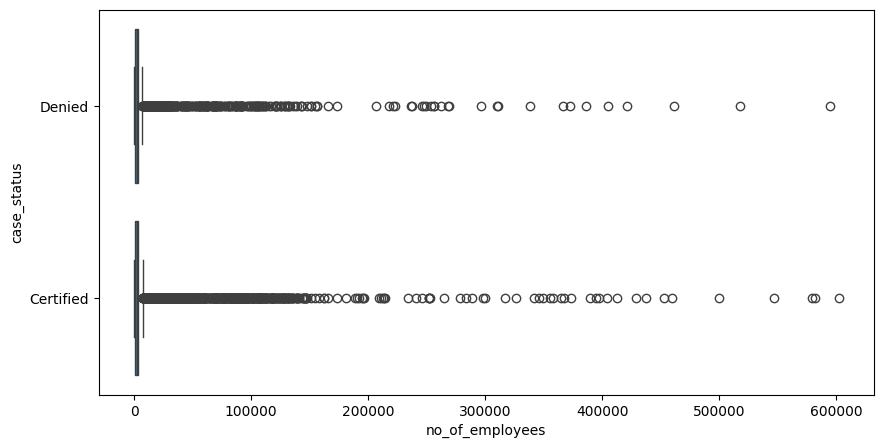

In [233]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="no_of_employees", y="case_status")
plt.show()

In [234]:
# Create a copy for preprocessing
df_processed = data.copy()



# 1. Check for missing values (EDA showed no missing values)
print("\n1. Missing Values:")
missing_values = data.isnull().sum()
if missing_values.sum() > 0:
    print(missing_values[missing_values > 0])
else:
    print("No missing values found (as expected from EDA)")

# 2. Check for duplicates
print("\n2. Duplicate Rows:")
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
if duplicates > 0:
    print(f"Percentage of duplicates: {(duplicates/len(data))*100:.2f}%")

# 3. Check skewness for variables identified in EDA as right-skewed
print("\n3. Skewness Analysis (EDA identified right-skewed variables):")
skewed_vars = ['no_of_employees', 'prevailing_wage', 'yr_of_estab']
for var in skewed_vars:
    if var in data.columns:
        skewness = data[var].skew()
        print(f"{var}: skewness = {skewness:.3f} ({'right-skewed' if skewness > 0.5 else 'approximately normal'})")




1. Missing Values:
No missing values found (as expected from EDA)

2. Duplicate Rows:
Number of duplicate rows: 0

3. Skewness Analysis (EDA identified right-skewed variables):
no_of_employees: skewness = 12.265 (right-skewed)
prevailing_wage: skewness = 0.756 (right-skewed)
yr_of_estab: skewness = -2.037 (approximately normal)


In [235]:



def temp_encode_for_correlation_check(df, target_col, figsize=(10,2)):
    """
    Plots a heatmap showing correlation of each numeric feature against target_col.
    Returns a Series of correlations (sorted by absolute magnitude).
    """
    # make a temporary copy
    df_temp = df.copy()
    # Encode categorical columns temporarily
    label_encoders = {}
    for col in df_temp.select_dtypes(include=["object", "category"]).columns:
        le = LabelEncoder()
        df_temp[col] = le.fit_transform(df_temp[col].astype(str))
        label_encoders[col] = le
    corrs = df_temp.corrwith(df_temp[target_col]).drop(target_col)
    corrs_df = corrs.to_frame(name='corr').T  # shape (1, n)
    plt.figure(figsize=figsize)
    sns.heatmap(
        corrs_df,
        annot=True,
        fmt=".3f",
        cmap="coolwarm",
        center=0,
        vmin=-1,
        vmax=1,
        cbar_kws={'orientation': 'vertical', 'shrink':0.7}
    )
    plt.xticks(rotation=45, ha='right')
    plt.yticks([0], [target_col], rotation=0)
    plt.title(f'Correlation of numeric features with {target_col}', fontsize=12)
    plt.tight_layout()
    plt.show()
    # return sorted correlations for downstream use
    return corrs.reindex(corrs.abs().sort_values(ascending=False).index)

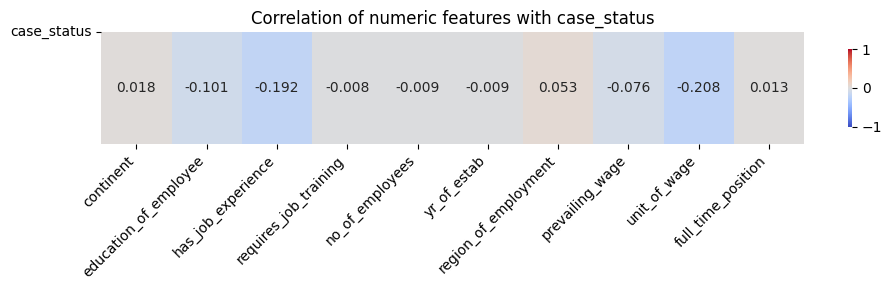

unit_of_wage            -0.207528
has_job_experience      -0.192162
education_of_employee   -0.100919
prevailing_wage         -0.076198
region_of_employment     0.053490
continent                0.017606
full_time_position       0.012711
no_of_employees         -0.008677
yr_of_estab             -0.008597
requires_job_training   -0.008423
dtype: float64

In [236]:
temp_encode_for_correlation_check(data,'case_status', figsize=(10,3))

In [237]:
def correlation_with_target(data, target_col, figsize=(10,2)):
    """
    Plots a heatmap showing correlation of each numeric feature against target_col.
    Returns a series of correlations (sorted by absolute magnitude).
    """
    # Keep only numeric columns
    df_duplicate= data.copy()


    # compute correlations of every numeric column with the target
    corrs = df_duplicate.corrwith(df_duplicate[target_col]).drop(target_col)

    corrs_df = corrs.to_frame(name='corr').T  # shape (1, n)

    plt.figure(figsize=figsize)
    sns.heatmap(
        corrs_df,
        annot=True,
        fmt=".3f",
        cmap="coolwarm",
        center=0,
        vmin=-1,
        vmax=1,
        cbar_kws={'orientation': 'vertical', 'shrink':0.7}
    )
    plt.xticks(rotation=45, ha='right')
    plt.yticks([0], [target_col], rotation=0)
    plt.title(f'Correlation of numeric features with {target_col}', fontsize=12)
    plt.tight_layout()
    plt.show()

    # return sorted correlations for downstream use
    return corrs.reindex(corrs.abs().sort_values(ascending=False).index)


In [238]:
data.to_csv("cleaned_Visa_dataset.csv", index=False)